### SA

In [2]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

followers_sa = pd.read_parquet('../../data/03-experiment/SA/baseline/01-preprocess/influencers/followers_ties_batch2.parquet')
followers_sa['weak'] = np.where(followers_sa['strong']== 1, 0, followers_sa['weak'])

followers_sa = followers_sa.drop_duplicates(['influencer_id', 'follower_id'])

In [3]:
followers_grouped_n_sa = followers_sa[['influencer_id', 'follower_id']].groupby('influencer_id').count()
followers_grouped_n_sa.rename({'follower_id': 'followers'}, axis=1, inplace=True)

followers_grouped_sa = followers_sa.groupby('influencer_id').sum()
followers_grouped_sa = followers_grouped_sa.merge(followers_grouped_n_sa, on='influencer_id', how='left')
followers_grouped_sa = followers_grouped_sa[['followers','strong', 'weak']]
followers_grouped_sa['absent'] = followers_grouped_sa['followers'] - followers_grouped_sa['strong'] - followers_grouped_sa['weak']

followers_grouped_sa

C:\Users\Dell\AppData\Local\Temp\ipykernel_14052\1993377337.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  followers_grouped_sa = followers_sa.groupby('influencer_id').sum()


,followers,strong,weak,absent
influencer_id,,,,
1006061273417699328,2510,1,122,2387
1016311337713131521,12858,145,622,12091
106246833,26755,904,3407,22444
107383577,2691,48,230,2413
1125568540818460674,27838,7,269,27562
1147165304,106069,198,2420,103451
1150196528,7955,116,780,7059
1169197110081851392,8789,121,558,8110
1267959115,4205,202,966,3037


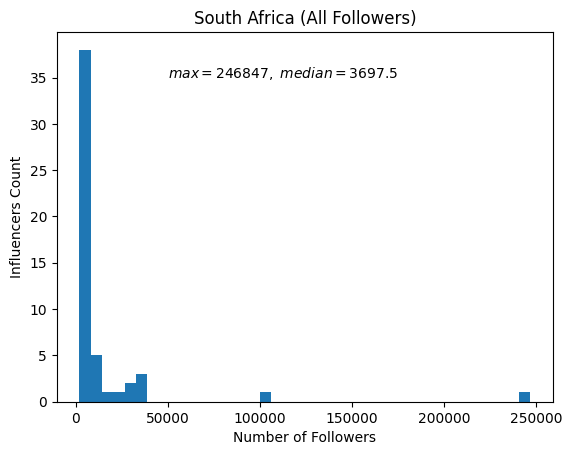

In [4]:
# Graphs:
x = followers_grouped_sa['followers']
max_f = followers_grouped_sa['followers'].max()
median_f = followers_grouped_sa['followers'].median()
plt.hist(x, bins = 40)
plt.xlabel('Number of Followers')
plt.ylabel('Influencers Count')
plt.title('South Africa (All Followers)')
plt.text(50000, 35,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/SA_all_influencers_batch2.png')
plt.show() 

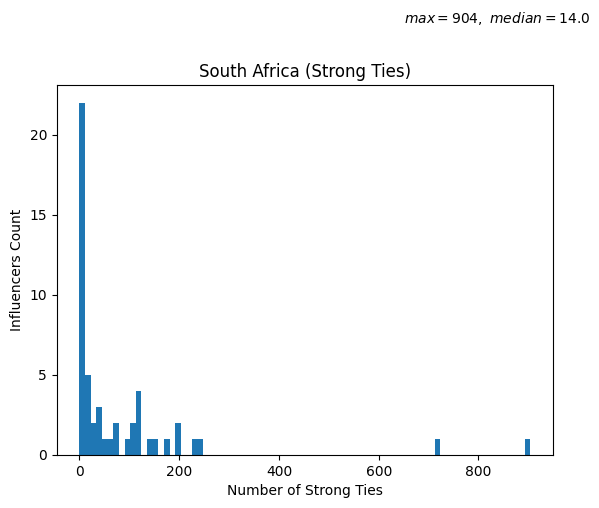

In [5]:
# Graphs:
x = followers_grouped_sa['strong']
max_f = followers_grouped_sa['strong'].max()
median_f = followers_grouped_sa['strong'].median()
plt.hist(x, bins = 80)
plt.xlabel('Number of Strong Ties')
plt.ylabel('Influencers Count')
plt.title('South Africa (Strong Ties)')
plt.text(650, 27,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/SA_strong_influencers_batch2.png')
plt.show() 

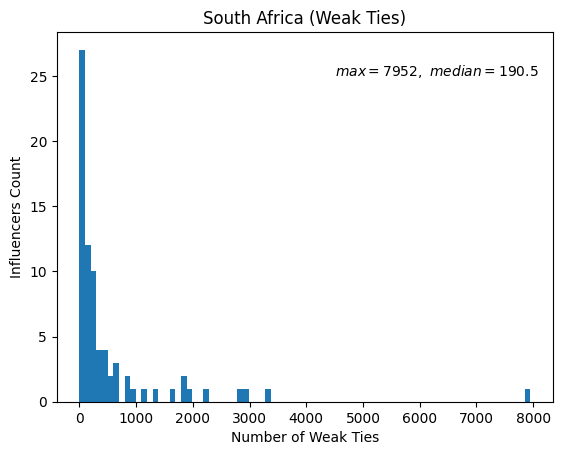

In [18]:
# Graphs:
x = followers_grouped_sa['weak']
max_f = followers_grouped_sa['weak'].max()
median_f = followers_grouped_sa['weak'].median()
plt.hist(x, bins = 80)
plt.xlabel('Number of Weak Ties')
plt.ylabel('Influencers Count')
plt.title('South Africa (Weak Ties)')
plt.text(4500, 25,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/SA_weak_influencers_.png')
plt.show() 

In [3]:
[followers_grouped_sa['followers'].mean(), followers_grouped_sa['strong'].mean(), followers_grouped_sa['weak'].mean()]

[10134.197368421053, 113.75, 565.0921052631579]

In [3]:
print(followers_grouped_sa.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  followers &  strong &  weak &  absent \\
influencer\_id       &            &         &       &         \\
\midrule
1022713275279126529 &       8570 &     484 &  1112 &    6974 \\
1062687066599948288 &       3112 &      31 &   411 &    2670 \\
1066970562          &       4799 &     163 &   801 &    3835 \\
107005960           &       2997 &      17 &    89 &    2891 \\
1081281             &       5465 &      16 &    57 &    5392 \\
1221676039061016577 &       5246 &      30 &   208 &    5008 \\
1254891809345585153 &       4011 &       9 &   112 &    3890 \\
1255087047318089731 &       3024 &      48 &   427 &    2549 \\
1260303158921879554 &       5938 &     186 &   538 &    5214 \\
1299669169634504706 &       2220 &      59 &   285 &    1876 \\
130619416           &       5586 &       0 &    15 &    5571 \\
1375155224          &      21188 &    1206 &  2230 &   17752 \\
14060749            &       4001 &       0 &    18 &    3983 \\
14161986       

C:\Users\Dell\AppData\Local\Temp\ipykernel_20608\1359064853.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(followers_grouped_sa.to_latex())


In [6]:
followers_grouped_sa.rename({'strong':'n_strong', 
                             'weak':'n_weak', 'absent':'n_absent'}, axis = 1, inplace = True)
followers_grouped_sa.to_parquet('../../data/02-randomize/SA/02-variables/variables_ties_batch2.parquet')

### KE

In [10]:
followers_ke = pd.read_parquet('../../data/03-experiment/KE/baseline/01-preprocess/influencers/followers_ties_batch2.parquet')
followers_grouped_n = followers_ke[['influencer_id', 'follower_id']].groupby('influencer_id').count()
followers_grouped_n.rename({'follower_id': 'followers'}, axis=1, inplace=True)

followers_grouped_ke = followers_ke.groupby('influencer_id').sum()
followers_grouped_ke = followers_grouped_ke.merge(followers_grouped_n, on='influencer_id', how='left')

followers_grouped_ke = followers_grouped_ke[['followers','strong', 'weak']]
followers_grouped_ke['absent'] = followers_grouped_ke['followers'] - followers_grouped_ke['strong'] - followers_grouped_ke['weak']

C:\Users\Dell\AppData\Local\Temp\ipykernel_14052\2893099712.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  followers_grouped_ke = followers_ke.groupby('influencer_id').sum()


In [11]:
print(followers_grouped_ke.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  followers &  strong &   weak &  absent \\
influencer\_id       &            &         &        &         \\
\midrule
1018169378456702976 &       6719 &      20 &    903 &    5796 \\
1025076448149884930 &       5189 &       9 &    105 &    5075 \\
1075292984005009409 &       4492 &      22 &    137 &    4333 \\
1095549520174346243 &       1928 &       0 &      8 &    1920 \\
1133474409761705984 &       2760 &      34 &     85 &    2641 \\
1144830490714738688 &       2214 &      16 &    367 &    1831 \\
1159888928          &       2393 &       0 &     10 &    2383 \\
1188918702437228544 &      10957 &      60 &    946 &    9951 \\
1205585565208457216 &       8512 &     199 &   1197 &    7116 \\
1224950314874306560 &       2475 &       6 &     44 &    2425 \\
1242760427626475522 &       2663 &       9 &     99 &    2555 \\
1270158499          &      30459 &      29 &    170 &   30260 \\
1298994593988403206 &       5446 &      58 &    339 &    5049 \\


C:\Users\Dell\AppData\Local\Temp\ipykernel_14052\572372706.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(followers_grouped_ke.to_latex())


In [5]:
[followers_grouped_ke['followers'].mean(), followers_grouped_ke['strong'].mean(), followers_grouped_ke['weak'].mean()]

[28438.342105263157, 326.4868421052632, 1459.0657894736842]

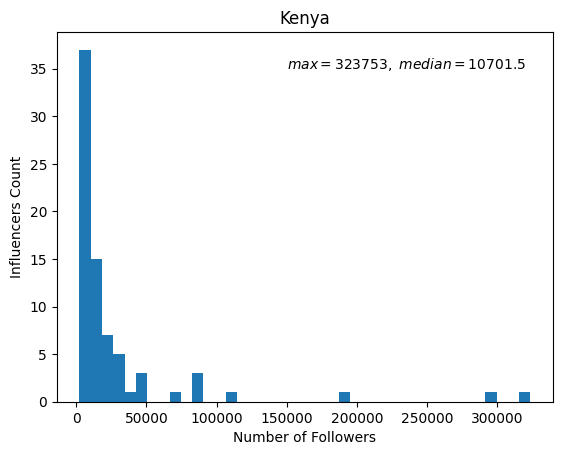

In [15]:
# Graphs:
x = followers_grouped_ke['followers']
max_f = followers_grouped_ke['followers'].max()
median_f = followers_grouped_ke['followers'].median()
plt.hist(x, bins = 40)
plt.xlabel('Number of Followers')
plt.ylabel('Influencers Count')
plt.title('Kenya')
plt.text(150000, 35,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/KE_all_influencers.png')
plt.show() 

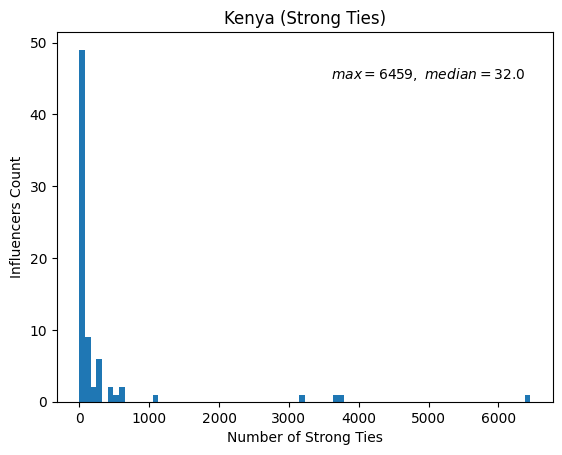

In [5]:
# Graphs:
x = followers_grouped_ke['strong']
max_f = followers_grouped_ke['strong'].max()
median_f = followers_grouped_ke['strong'].median()
plt.hist(x, bins = 80)
plt.xlabel('Number of Strong Ties')
plt.ylabel('Influencers Count')
plt.title('Kenya (Strong Ties)')
plt.text(3600, 45,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/KE_strong_influencers.png')
plt.show() 

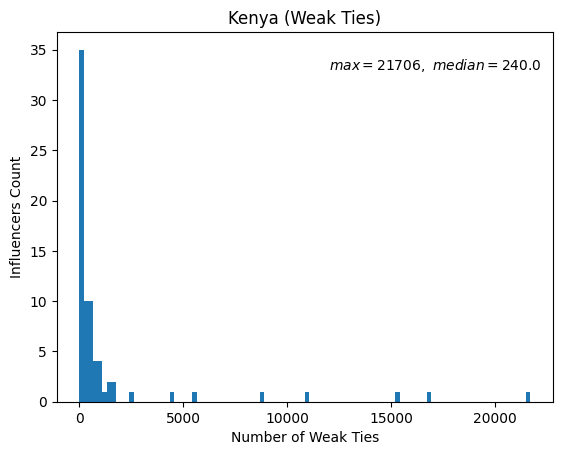

In [26]:
# Graphs:
x = followers_grouped_ke['weak']
max_f = followers_grouped_ke['weak'].max()
median_f = followers_grouped_ke['weak'].median()
plt.hist(x, bins = 100)
plt.xlabel('Number of Weak Ties')
plt.ylabel('Influencers Count')
plt.title('Kenya (Weak Ties)')
plt.text(12000, 33,
         f'$max={max_f},\ median={median_f}$')

plt.savefig('../../results/00-summary_stats/KE_weak_influencers.png')
plt.show() 

In [12]:
followers_grouped_ke.rename({'strong':'n_strong', 
                             'weak':'n_weak', 'absent':'n_absent'}, axis = 1, inplace = True)
followers_grouped_ke.to_parquet('../../data/02-randomize/KE/02-variables/variables_ties_batch2.parquet')